### 🔄 Task 1:  load the data from database 

In [6]:
import polars as pl
import sqlite3

ModuleNotFoundError: No module named 'polars'

In [3]:
conn = sqlite3.connect('major_league_statcast.db')

df = pl.read_database('SELECT * FROM statcast_data', conn)

conn.close()
print(df.head)

NameError: name 'sqlite3' is not defined

### 🔄 Task 2 :  explore the data

Begin exploring the data. You will want to understand:

- What columns exist in the data?
- What is the type of each column (e.g. string, number, category, date)?
- Which columns could be useful for the model?
- What steps will I need to perform to clean the data?

**Tips**

- Use VS Codes built in data viewer to explore the data.
- If you are more comfortable with Pandas, you can convert the polars dataframe into a pandas dataframe (e.g. `df.to_pandas()`).
- The polars user guide has great docs on how to use polars: https://docs.pola.rs.

🚨 We are not performing feature engineering at this stage. But it is a good time to start thinking about what features you can create from the data.

In [2]:
#View Data
df.head(2)

NameError: name 'df' is not defined

In [75]:
#List of Columns 
list(df.columns)

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher_1',
 'fielder_2_1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [76]:
#What are the numerical columns? 
df.select(pl.selectors.numeric()).head()

release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher_1,fielder_2_1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
85.8,1.75,5.94,677870.0,598286.0,3.0,1.0,0.0,0.0,2024.0,1.04,0.16,0.29,2.75,null,null,682619.0,2.0,9.0,127.68,183.52,665966.0,-5.445048,-124.800602,-1.562434,11.977626,26.108795,-30.442818,3.12,1.57,2.0,85.4,-54.0,84.1,1919.0,5.3,753616.0,598286.0,665966.0,677954.0,702332.0,669023.0,675656.0,677592.0,656185.0,663604.0,55.19,0.186,0.167,0.0,1.0,0.0,0.0,2.0,96.0,1.0,9.0,12.0,9.0,12.0,12.0,9.0,9.0,12.0,125.0,-0.014,-0.244
75.4,1.94,5.92,686490.0,598286.0,12.0,2.0,1.0,2.0,2024.0,1.35,0.38,1.54,2.67,null,null,682619.0,1.0,9.0,null,null,665966.0,-3.169584,-109.909609,-0.432053,11.543284,16.909058,-29.210926,3.25,1.64,null,null,null,74.4,1568.0,5.2,753616.0,598286.0,665966.0,677954.0,702332.0,669023.0,675656.0,677592.0,656185.0,663604.0,55.32,null,0.0,0.0,1.0,0.0,0.0,null,95.0,5.0,9.0,12.0,9.0,12.0,12.0,9.0,9.0,12.0,113.0,-0.028,-0.226
76.0,1.84,5.94,686490.0,598286.0,13.0,null,0.0,2.0,2024.0,1.34,0.65,-0.3,0.74,null,null,682619.0,1.0,9.0,null,null,665966.0,-6.751937,-110.460788,-4.899451,12.144516,19.651204,-26.175477,3.25,1.64,null,null,null,74.7,1570.0,5.4,753616.0,598286.0,665966.0,677954.0,702332.0,669023.0,675656.0,677592.0,656185.0,663604.0,55.14,null,null,null,null,null,null,null,95.0,4.0,9.0,12.0,9.0,12.0,12.0,9.0,9.0,12.0,113.0,0.0,0.051
75.4,1.85,5.93,686490.0,598286.0,8.0,null,0.0,2.0,2024.0,0.71,0.4,0.08,2.06,null,null,682619.0,1.0,9.0,null,null,665966.0,-4.84482,-109.908618,-1.760967,6.544678,15.860255,-28.84014,3.25,1.64,null,null,null,74.8,1449.0,5.4,753616.0,598286.0,665966.0,677954.0,702332.0,669023.0,675656.0,677592.0,656185.0,663604.0,55.14,null,null,null,null,null,null,null,95.0,3.0,9.0,12.0,9.0,12.0,12.0,9.0,9.0,12.0,112.0,0.0,0.0
85.5,1.83,5.87,686490.0,598286.0,5.0,null,0.0,1.0,2024.0,1.49,0.15,0.26,2.4,null,null,682619.0,1.0,9.0,null,null,665966.0,-6.584302,-124.441886,-2.235255,16.784583,22.793861,-30.336796,3.25,1.64,197.0,93.6,11.0,84.5,1895.0,5.4,753616.0,598286.0,665966.0,677954.0,702332.0,669023.0,675656.0,677592.0,656185.0,663604.0,55.09,null,null,null,null,null,null,null,95.0,2.0,9.0,12.0,9.0,12.0,12.0,9.0,9.0,12.0,118.0,0.0,-0.084


In [77]:
#What are the string columns
df.select(pl.selectors.string()).head()

pitch_type,game_date,player_name,events,description,des,game_type,stand,p_throws,home_team,away_team,type,bb_type,inning_topbot,pitch_name,if_fielding_alignment,of_fielding_alignment
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""SI""","""2024-03-29 00:00:00""","""Ramirez, Nick""","""field_out""","""hit_into_play""","""Leo Jimenez grounds out, pitch…","""R""","""R""","""L""","""BUF""","""SWB""","""X""","""ground_ball""","""Bot""","""Sinker""","""Strategic""","""Standard"""
"""CH""","""2024-03-29 00:00:00""","""Ramirez, Nick""","""strikeout""","""swinging_strike""","""Cam Eden strikes out swinging.""","""R""","""R""","""L""","""BUF""","""SWB""","""S""",null,"""Bot""","""Changeup""","""Standard""","""Standard"""
"""CH""","""2024-03-29 00:00:00""","""Ramirez, Nick""",null,"""blocked_ball""","""Cam Eden strikes out swinging.""","""R""","""R""","""L""","""BUF""","""SWB""","""B""",null,"""Bot""","""Changeup""","""Standard""","""Standard"""
"""CH""","""2024-03-29 00:00:00""","""Ramirez, Nick""",null,"""foul""","""Cam Eden strikes out swinging.""","""R""","""R""","""L""","""BUF""","""SWB""","""S""",null,"""Bot""","""Changeup""","""Standard""","""Standard"""
"""SI""","""2024-03-29 00:00:00""","""Ramirez, Nick""",null,"""foul""","""Cam Eden strikes out swinging.""","""R""","""R""","""L""","""BUF""","""SWB""","""S""",null,"""Bot""","""Sinker""","""Standard""","""Standard"""


In [78]:
#Export if needed
df.write_csv("statcast.csv")

In [79]:
#How much data is missing?
(
    df.null_count()
    .transpose(include_header=True)
    .rename({"column": "Column Name", "column_0": "Missing Rows"})
    .with_columns(
        ((pl.col("Missing Rows") / df.shape[0]) * 100)
        .round(1)
        .alias("% Missing")
    )
    .sort("Missing Rows", descending=True)
)

Column Name,Missing Rows,% Missing
str,u32,f64
"""spin_dir""",759139,100.0
"""spin_rate_deprecated""",759139,100.0
"""break_angle_deprecated""",759139,100.0
"""break_length_deprecated""",759139,100.0
"""tfs_deprecated""",759139,100.0
…,…,…
"""post_away_score""",0,0.0
"""post_home_score""",0,0.0
"""post_bat_score""",0,0.0


### 🔄 Task 3 :  Tidy the data

Convert the datetimes from strings to polars datetime objects. The logic is pretty complex. So we will abstract it into a function that we can apply to all of the required columns.

In [80]:
#Conversion
def convert_string_to_datetime(series: pl.Series) -> pl.Series:
    """
    Convert the datetime format from statcast into a datetime format that polars
    can understand.
    """
    # Convert the series to datetime using Polars' built-in functionality
    datetime_series = series.str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S")
    return datetime_series

In [81]:
#Test Function
convert_string_to_datetime(pl.Series(["2024-03-29 00:00:00"]))

""
datetime[μs]
2024-03-29 00:00:00


In [82]:
df_clean = df.with_columns(
    (
        pl.col("game_date").map_batches(
            convert_string_to_datetime
        )
    )
)

In [83]:
#Replace Pitch Type Abbreviations with Pitch Name 
pitch_type_mapping = {
#Fastball 
    "FF": "Fastball (4-seam)",
    "SI": "Sinker (2-seam)",
    "FC": "Cutter",
#Offspeed 
    "CH": "Changeup",
    "FS": "Split-finger",
    "FO": "Forkball", 
    "SC": "Screwball",
#Breaking 
    "CU": "Curveball", 
    "KC": "Knuckle Curve", 
    "CS": "Slow Curve",
    "SL": "Slider", 
    "ST": "Sweeper", 
    "SV": "Slurve", 
    "KN": "Knuckleball", 
#Other Pitches
    "EP": "Euphus", 
    "FA": "Other", 
    "IN": "Intentional Ball", 
    "PO": "Pitchout"
}

In [84]:
pitch_type_mapping_df = pl.DataFrame(
    {
        "OldName": pitch_type_mapping.keys(),
        "CorrectName": pitch_type_mapping.values(),
    }
)

pitch_type_mapping_df

OldName,CorrectName
str,str
"""FF""","""Fastball (4-seam)"""
"""SI""","""Sinker (2-seam)"""
"""FC""","""Cutter"""
"""CH""","""Changeup"""
"""FS""","""Split-finger"""
…,…
"""KN""","""Knuckleball"""
"""EP""","""Euphus"""
"""FA""","""Other"""


In [85]:
#Used for Validation
pitch_type_mapping_series = [
    "Fastball (4-seam)","Sinker (2-seam)","Cutter","Changeup","Split-finger",
    "Forkball","Screwball","Curveball","Knuckle Curve","Slow Curve","Slider", "Sweeper","Slurve", 
    "Knuckleball","Euphus","Other","Intentional Ball","Pitchout"]

In [93]:
df_clean_tidy = (
    df_clean.join(
        pitch_type_mapping_df,
        left_on="pitch_type",
        right_on="OldName",
        how="left",
        validate="m:1",
        coalesce=True
    )
    .rename({"CorrectName": "pitch_type_corrected"})
    #.drop(["Departing", "Arriving"])
    .rename({"pitch_type_corrected": "pitch_type_new"})
    .select(
        [
            "pitch_type_new",
            "game_date",
            "release_speed",
            "release_pos_x",
            "release_pos_z",
            "events",
            "description",
            "zone",
            "des",
            "stand",
            "p_throws",
            "hit_location",
            "bb_type",
            "pfx_x",
            "pfx_z",
            "plate_x",
            "plate_z",
            "hc_x",
            "hc_y",
            "hit_distance_sc",
            "launch_speed",
            "launch_angle",
            "release_spin_rate"
        ]
            ) 
    .filter(pl.col("description").is_in(["hit_into_play"])& ~pl.col('pitch_type_new').is_null())  
)

In [94]:
df_clean_tidy['pitch_type_new'].value_counts()

pitch_type_new,count
str,u32
"""Fastball (4-seam)""",37560
"""Sinker (2-seam)""",23169
"""Curveball""",6742
"""Knuckle Curve""",417
"""Slurve""",82
…,…
"""Euphus""",55
"""Forkball""",74
"""Cutter""",11502


In [95]:
#Export if needed
df_clean_tidy.write_csv("statcast_clean.csv")

In [110]:
df_clean_tidy.shape[0]

120586

### 🔄 Task 4 : Validate the Data

In the previous activity we tidied the dataset. For some projects, this may be enough. However, for this project we plan to refresh the data on a regular basis. We would like to gain additional comfort that the data we are using is correct. Data validation can help prove that our data tidying was correct, and find any potential issues if the upstream data changes.

[Pandera](https://pandera.readthedocs.io/en/stable/) is a Python library for validating Pandas dataframes. There are two steps:

1. Define a schema for your data. For example:
   - Define the type for each column
   - Confirm if null values are allowed
   - Define custom checks
2. Run your data through the schema validator.

You will find these links useful when defining your schema:

- Polars data validation guide: https://pandera.readthedocs.io/en/stable/polars.html#usage
- Polars data types: https://pandera.readthedocs.io/en/stable/reference/dtypes.html#polars-dtypes
- `Column(` API: https://pandera.readthedocs.io/en/stable/reference/generated/pandera.api.dataframe.model_components.Field.html#pandera.api.dataframe.model_components.Field
- List of built in checks you can use with `Column(`: https://pandera.readthedocs.io/en/stable/reference/generated/pandera.api.checks.Check.html#pandera.api.checks.Check

The class below defines the schema and checks for the `Statcast Minor League Data` data set.

- Each column is a class attribute. At a minimum, we define the column type (e.g. int, str, datetime, etc.)
- For some columns, we use `Column(` to add more checks. For example in the `events` column we are going to allow nullable values.
- We can define additional and more complex column and dataframe level checks by defining class methods.

In [96]:
import pandera as pa
from pandera import Column, Check, DataFrameSchema, Index
import pandas as pd
#from pandera.engines.polars_engine import DateTime, Date, Int64

In [97]:
#Convert to Pandas dataframe. Locally, Polars and Pandera are not working well together but it should get better in the future. 
df_clean_tidy_pandas = df_clean_tidy.to_pandas()

In [104]:
#Validations to build
#1. Check if all required columns exist - All Columns Listed in Schema are required. If you want to make a feature optional, put required=False
#2. Check if Launch Speed is Negative
#3. Validate all Data Types 
#4. Error if extra columns (making sure theres no new features on accident). This is the strict=True argument. Otherwise do strict='filter' to drop them. 
#5. Error if pitch type not in the pitch type dictionary
#6. Column Order. If you want order to matter, put ordered=True
#7. If a column is missing, add it. add_missing_columns=True

schema = pa.DataFrameSchema({
    "pitch_type_new": Column(str,Check.isin(pitch_type_mapping_series),nullable=False),
    "game_date": Column(pd.Timestamp,nullable=True),
    "release_speed": Column(float, Check(lambda s: s < 110),nullable=True),
    "release_pos_x": Column(float,nullable=True),
    "release_pos_z":Column(float,nullable=True),
    "events": Column(str,nullable=True),
    "description": Column(str,nullable=True),
    "zone": Column(float,nullable=True),
    "des": Column(str,nullable=True),
    "stand": Column(str,nullable=True),
    "p_throws": Column(str,nullable=True),
    "hit_location": Column(float,nullable=True),
    "bb_type": Column(str,nullable=True),
    "pfx_x": Column(float,nullable=True),
    "pfx_z": Column(float,nullable=True),
    "plate_x": Column(float,nullable=True),
    "plate_z": Column(float,nullable=True),
    "hc_x": Column(float,nullable=True),
    "hc_y": Column(float,nullable=True),
    "hit_distance_sc": Column(float,nullable=True),
    "launch_speed": Column(float,Check(lambda s: s > 0),nullable=True),
    "launch_angle": Column(float,nullable=True),
    "release_spin_rate": Column(float,nullable=True)
    }, strict=True, ordered=True, add_missing_columns=True)

To validate the data, run the dataframe through the `pa.DataFrameModel.validate` method.

In [105]:
try: 
    schema.validate(df_clean_tidy_pandas)
except pa.errors.SchemaError as exc: 
    print(exc)

### 🔄  Write Cleaned and Tidy Results to Database

In [115]:
if df_clean_tidy_pandas is not None and not df_clean_tidy_pandas.empty:
        conn = sqlite3.connect('major_league_statcast.db')
        #conn.execute("TRUNCATE TABLE statcast_data_clean")
        # Insert data into the SQLite database
        df_clean_tidy_pandas.to_sql('statcast_data_clean', conn,if_exists='replace', index=False)

In [120]:
statcast_data_clean = pd.read_sql('SELECT * FROM statcast_data_clean',conn)
statcast_data_clean.shape[0]

120586

In [121]:
statcast_data_clean.head()

,pitch_type_new,game_date,release_speed,release_pos_x,release_pos_z,events,description,zone,des,stand,...,pfx_x,pfx_z,plate_x,plate_z,hc_x,hc_y,hit_distance_sc,launch_speed,launch_angle,release_spin_rate
0,Sinker (2-seam),2024-03-29 00:00:00,85.8,1.75,5.94,field_out,hit_into_play,3.0,"Leo Jimenez grounds out, pitcher Nick Ramirez ...",R,...,1.04,0.16,0.29,2.75,127.68,183.52,2.0,85.4,-54.0,1919.0
1,Changeup,2024-03-29 00:00:00,75.4,3.29,5.98,field_out,hit_into_play,13.0,Payton Henry flies out to left fielder Everson...,R,...,1.25,0.61,-0.06,1.43,73.44,113.05,294.0,87.2,38.0,1543.0
2,Sinker (2-seam),2024-03-29 00:00:00,85.1,3.39,5.90,single,hit_into_play,5.0,Orelvis Martinez singles on a line drive to ce...,R,...,1.29,0.34,0.20,2.44,116.69,106.07,182.0,77.2,19.0,1905.0
3,Sinker (2-seam),2024-03-29 00:00:00,93.9,1.83,6.02,field_out,hit_into_play,4.0,"Kevin Smith grounds out, pitcher Brendon Littl...",R,...,1.27,-0.01,-0.61,2.43,129.20,181.49,8.0,87.9,-16.0,2052.0
4,Sinker (2-seam),2024-03-29 00:00:00,93.8,1.77,6.04,field_out,hit_into_play,4.0,"Jose Rojas grounds out softly, pitcher Brendon...",L,...,1.12,-0.26,-0.32,2.47,132.43,195.24,1.0,52.0,-70.0,2070.0


### 🔄  Set up email with Posit Connect and Quarto

In [118]:
import quarto

Posit Connect has support for sending emails with Quarto: https://docs.posit.co/connect/user/quarto/#email-customization. 

Generate an email to update all the email recipients on the status of the new data. 

**Tips**

Run the following in the terminal to preview the email:

```bash
quarto render notebook.ipynb --execute --output-dir tmp
```

The open `tmp/email-preview/index.html` to preview the email.

Define the variable data

In [119]:
import datetime 

todays_date = datetime.datetime.now().strftime("%Y-%m-%d")
todays_date

'2024-08-22'

Create your email template.

MLB Play-by-Play Data Validation Report for `{python} todays_date`

**Update**

The Statcast MLB Play by Play data has been updated and validated. The following data sets are available for your use:

- Play by Play Cleaned: `{python} f"{username}_statcast_data_clean"`


C:\Users\zetvz\AppData\Local\Temp\ipykernel_13440\279840034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = pd.to_datetime(filtered_data['game_date']).dt.to_period('M').dt.to_timestamp()


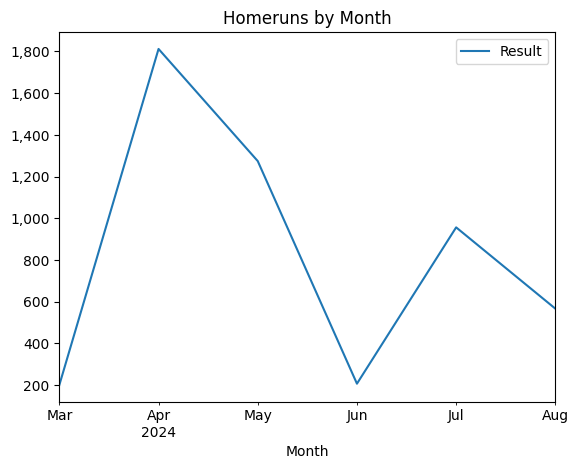

In [127]:
# | echo: false
import matplotlib.pyplot as plt
import matplotlib as mpl
filtered_data = statcast_data_clean[statcast_data_clean['events'] == 'home_run']


# Assuming statcast_data_clean is a Pandas DataFrame
filtered_data['Month'] = pd.to_datetime(filtered_data['game_date']).dt.to_period('M').dt.to_timestamp()
result_df = (filtered_data.groupby('Month')['events'].count().reset_index(name='Result'))
result_df.plot(x='Month', y='Result', title='Homeruns by Month')
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))

#plt.show()

 ### 🔄 Task - publish notebook as Quarto document to Posit Connect

Deploy the notebook to Posit Connect as a Quarto document.

**Posit Publisher**

Deploy using the Posit Publisher VS Code extension. Check that you have the required environment variables:

```bash
source .env
echo $CONNECT_SERVER
echo $CONNECT_API_KEY
```